<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
#imports
from tensorflow import keras 
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np


(X_train, y_train), (X_test, y_test) = boston_housing.load_data() # load data in, already seperated by features/target
y_train.shape, X_train[0].shape, X_test.shape, y_test.shape

((404,), (13,), (102, 13), (102,))

In [2]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [3]:

# Create model architecture
model = Sequential(name="BaselineNN")

model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.summary()

Model: "BaselineNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit model on train data
history = model.fit(X_train, y_train, epochs=250, validation_split=.10, verbose=False)

In [8]:
# Look at final metrics from model
print("\n MSE: $", model.evaluate(X_train, y_train)[0]*1000)

404/404 [==============================] - 0s 42us/sample - loss: 31.2510 - mse: 31.2510

 MSE: $ 31251.01120637195


In [9]:
# Look at metrics on test data
print("\n MSE: $", model.evaluate(X_test, y_test)[0]*1000)

102/102 [==============================] - 0s 78us/sample - loss: 33.3889 - mse: 33.3889

 MSE: $ 33388.86664895451


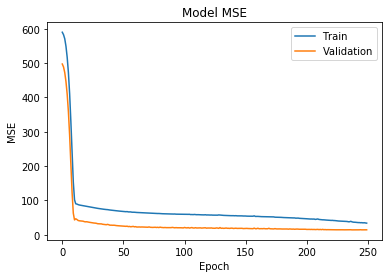

In [12]:
# visualize model by mse
import matplotlib.pyplot as plt

# plot training & validation MSE values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show();

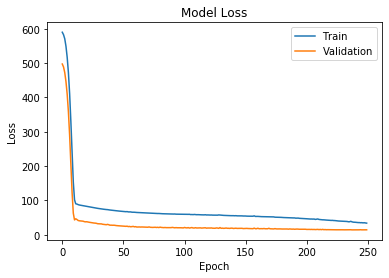

In [13]:
# visualize model by loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [14]:
# Try Linear Regression Model
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(
    n_estimators=200,
    min_samples_leaf=10,
    max_depth=10)

# Fit model
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:

# Get MAE for test & train data

from sklearn.metrics import mean_squared_error

y_pred_train = reg.predict(X_train)
mse = 1000 * (mean_squared_error(y_train, y_pred_train))
print(f'Train MSE: ${mse}')

y_pred_test = reg.predict(X_test)
mse = 1000 * (mean_squared_error(y_test, y_pred_test))
print(f'Test MSE: ${mse}')

Train MSE: $47.33344303883059
Test MSE: $14961.456214094196


In [ ]:
'''
Linear Regression is definitely the way to go with this problem, 
which makes sense because of Jon-Cody's remarks about NN's being
more useful for images/video/audio, or other generally huge data
'''

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [19]:
# Import the dataset and spluit it into X_train/test and y_train/test
from tensorflow.keras.datasets import fashion_mnist # Import data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # Load data as X's and y's

4423680/4422102 [==============================] - 1s 0us/step


In [20]:
# Set hyper parameter variables
batch_size = 64
num_classes = 10
epochs = 100

In [21]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Change d-type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Change y to correct encoding for output
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
mnist_model = Sequential(name='BaselineMnist')

# Input -> Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10, activation='softmax'))

# Compile
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

mnist_model.summary()

Model: "BaselineMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [23]:

# fit model on train data
history = mnist_model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=.10, 
                    verbose=False)
scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.4953 - accuracy: 0.8389


In [24]:

# Print scores
val_acc = max(history.history['val_accuracy'])
print(f'Best Validation Accuracy: {val_acc:.2%}')
print(f'Test Accuracy: {scores[1]:.2%}')

Best Validation Accuracy: 85.83%
Test Accuracy: 83.89%


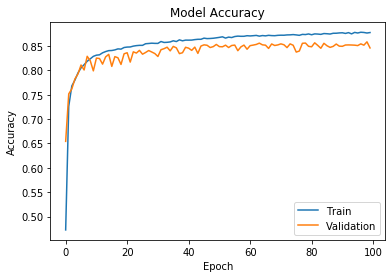

In [25]:

# Visualize Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show();

In [26]:
# Try some different parameters
mnist_model = Sequential(name='SecondMnist')

# Input -> Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10, activation='softmax'))

# Compile
mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adadelta',
                   metrics=['accuracy'])

mnist_model.summary()

Model: "SecondMnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                

In [27]:
# fit model on train data
history = mnist_model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=.10, 
                    verbose=False)
scores = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 1.4776 - accuracy: 0.4909


In [28]:
# Print scores
val_acc = max(history.history['val_accuracy'])
print(f'Best Validation Accuracy: {val_acc:.2%}')
print(f'Test Accuracy: {scores[1]:.2%}')

Best Validation Accuracy: 48.83%
Test Accuracy: 49.09%


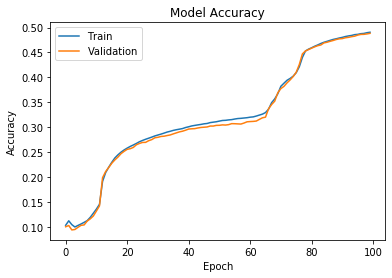

In [29]:
# Visualize Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.